In [1]:
%load_ext autoreload
%autoreload 2

import builtins
import IPython.lib.deepreload
builtins.reload = IPython.lib.deepreload.reload # type: ignore

In [2]:
from typing import Any, cast, Dict

import numpy as np
import matplotlib.pyplot as plt

import swcgeom
from swcgeom.analysis import draw, Sholl
from swcgeom.utils import numpy_printoptions
from swcgeom.analysis import Feature, extract_feature

In [3]:
swc1 = "data/101711-10_4p5-of-16_initial.CNG.swc"
swc2 = "data/101711-11_16-of-16_initial.CNG.swc"
swc3 = "data/1059283677_15257_2226-X16029-Y23953.swc"

# create a tree
tree1 = swcgeom.Tree.from_swc(swc1)
tree2 = swcgeom.Tree.from_swc(swc2)
tree3 = swcgeom.Tree.from_swc(swc3, extra_cols=["seg_id","level","mode","timestamp","TFresindex"])

population = swcgeom.Population.from_swc("data/")

===== Single Feature =====
length [53405.574]
===== Feature List =====
[array([53405.574], dtype=float32)]
===== Features =====
--- length ---
(1,)
--- node_radial_distance ---
(5514,)
--- node_branch_order ---
(288,)
--- branch_length ---
(287,)
--- path_length ---
(148,)
--- sholl ---
(10517,)
===== Features Distribution =====
--- length ---
(10,) (11,)
--- node_radial_distance ---
(10,) (11,)
--- node_branch_order ---
(10,) (11,)
--- branch_length ---
(10,) (11,)
--- path_length ---
(10,) (11,)
--- sholl ---
(1051,) (1051,)


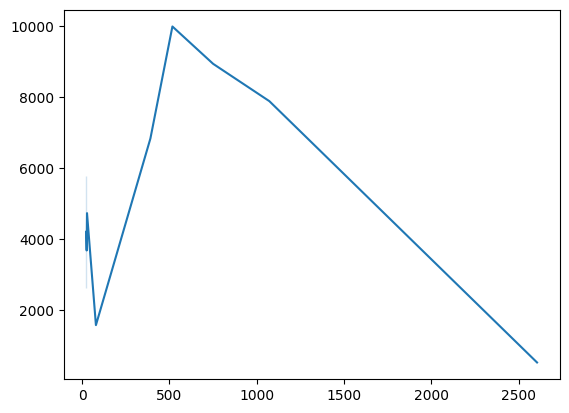

In [7]:
features = extract_feature(tree3)
all_features: Dict[Feature, Dict] = {
    "length": {},
    "node_radial_distance": {},
    "node_branch_order": {},
    "branch_length": {},
    "path_length": {},
    "sholl": {},
}

print("===== Single Feature =====")
print("length", features.get("length"))

print("===== Feature List =====")
with numpy_printoptions(threshold=10):
    print(features.get(["length"]))

print("===== Features =====")
with numpy_printoptions(threshold=10):
    for k, v in features.get(all_features).items():
        print(f"--- {k} ---")
        print(v.shape)

print("===== Features Distribution =====")
with numpy_printoptions(threshold=5):
    for k, (x, y) in features.get_histogram(all_features).items():
        print(f"--- {k} ---")
        print(x.shape, y.shape)

_ = features.plot_histogram("node_radial_distance")

===== Single Feature =====
length [array([3632.4885], dtype=float32), array([6833.212], dtype=float32), array([53405.574], dtype=float32)]
===== Features =====
--- length ---
[(1,), (1,), (1,)]
--- node_radial_distance ---
[(161,), (318,), (5514,)]
--- node_branch_order ---
[(36,), (88,), (288,)]
--- branch_length ---
[(35,), (87,), (287,)]
--- path_length ---
[(21,), (49,), (148,)]
--- sholl ---
[(466,), (460,), (10517,)]


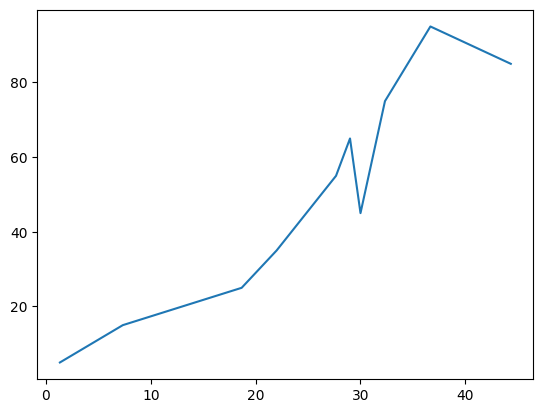

In [9]:
features = extract_feature(population)

print("===== Single Feature =====")
print("length", features.get("length"))

print("===== Features =====")
for k, v in features.get(all_features).items():
    print(f"--- {k} ---")
    print([vv.shape for vv in v])

_ = features.plot_histogram("node_radial_distance")

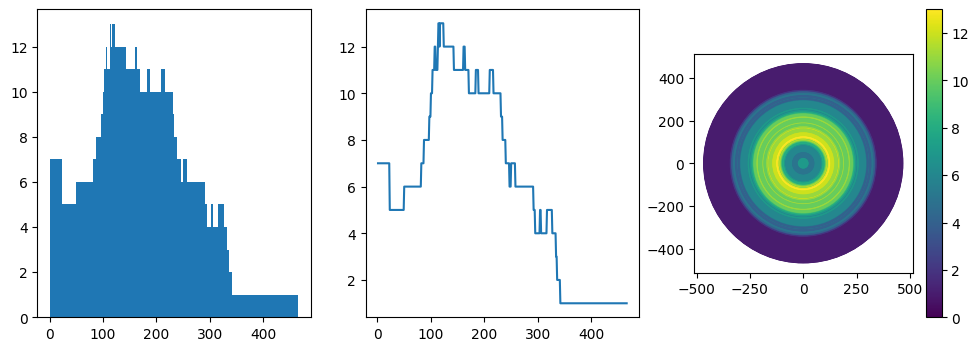

In [11]:
from swcgeom.analysis import Sholl

sholl_result = Sholl(tree1)

fig, (ax0, ax1, ax2) = plt.subplots(1, 3)
fig.set_size_inches(12, 4)
_ = sholl_result.plot(plot_type="bar", ax=ax0)
_ = sholl_result.plot(plot_type="linechart", ax=ax1)
_ = sholl_result.plot(plot_type="circles", ax=ax2)

In [12]:
from swcgeom.analysis import BranchFeatures

angles = BranchFeatures(tree1).get_angle()
print(angles.shape)
print(angles.min())
print(angles.max())

(35, 35)
0.0
3.1412473
